<a href="https://colab.research.google.com/github/mauriceschmetzer/Practical_Deep_Learning_Language_Processing/blob/main/Assignment_1_PDL_WS2024_Maurice_Schmetzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Name**: Maurice Schmetzer
####**Matriculation Number**: 5472684

## **Importing Packages**

In [ ]:
#To Load Data in Colab
from google.colab import drive # Used to access Google Drive to import data
import shutil # Used to copy data from Google Drive

# General Packages
import pandas as pd
import numpy as np

#Working with Text
import re #To split text into words
from collections import Counter #To count words
from itertools import islice #To slice dictionary

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# **<u>Part 1: Word Embeddings with Word Co-Occurence Matrix</u>**

## **Step 1: Load Text Data**

In [ ]:
#Mount to Google Drive to be able to access data (images & labels)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Define general path
path_dir = "/content/drive/My Drive/2) College & Other Education/1) College/1) Master of Science Data Science in Business & Economics/3. Semester/DS405B_Practical_Deep_Learning_for_Language_Processing/Assignments/Assignment 1"

In [ ]:
#Copy image data to local machine to allow for faster estimation.
shutil.copy(f"{path_dir}/Data/brown.txt", "brown.txt")

'brown.txt'

In [ ]:
with open("brown.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
print("Total number of character:", len(raw_text))

Total number of character: 6086599


## **Step 2: Function: get_word_frequencies()**

In [ ]:
def get_word_frequencies(text):

  #Source: Lecture Notes
  words = re.split(r'([,.:;?_!"()\']|--|\s)', text)
  words = [item.strip() for item in words if item.strip()]

  #Source: https://stackoverflow.com/questions/49941646/python-counter-function-to-count-words-in-documents-with-more-then-one-occurre
  word_frequencies = Counter(unique_words)

  return word_frequencies

## **Step 3: Function: create_vocab()**

In [ ]:
def create_vocab(word_frequencies, V):

  #Source: https://www.geeksforgeeks.org/python-most_common-function/
  top_V_words = word_frequencies.most_common(V)

  #We only need the words themself but not the frequencies
  most_common_words = [word for word, count in top_V_words]
  most_common_words.extend(["<|unk|>"]) #Adds two new special tokens

  #Assigns Index to each word (Source: Lecture Notes)
  vocab = {token:integer for integer, token in enumerate(most_common_words)}

  #Returns vocabulary of V most common words
  return vocab

## **Step 4: Function: windowizer()**

In [ ]:
def windowizer(text):
  #Splits the text
  words = re.split(r'([,.:;?_!"()\']|--|\s)', text)
  words = [item.strip() for item in words if item.strip()]

  #Creates empty list where the window will be stored
  window_list = []

  #Loops over range of words
  for i in range(len(words) - 1):

    #Creates current window as string with current (i) and next word (i + 1)
    current_window = f"{words[i]} {words[i + 1]}"

    #Appends word to list
    window_list.append(current_window)

  #Return list of windows
  return window_list


## **Step 5: Construct Word Co-Occurence Matrix for Brown Corpus**

In [ ]:
#Source: Lecture Notes
class SimpleTokenizer:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]

        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        return text

In [ ]:
#Size of Vocabulary
V = 20000

word_frequencies = get_word_frequencies(raw_text)
vocab = create_vocab(word_frequencies, V)
tokenizer = SimpleTokenizer(vocab) #Creates functions to get index of word and vice versa
windows = windowizer(raw_text)

In [ ]:
coocurrence_matrix = np.zeros((V + 1, V + 1)) #First I create a matrix with zeros (+1 to account for unknown words)

for window in windows: #Loops over all windows
  word1, word2 = window.split() #Split the window into the two words

  i_word1 = tokenizer.encode(word1) #Get the index of word 1 in vocabulary
  i_word2 = tokenizer.encode(word2) #Get the index of word 2 in vocabulary

  #The the index in the vocabulary is used as index in the matrix.
  #I add +1 in count to the matrix for each coocurrance.
  coocurrence_matrix[i_word1, i_word2] = coocurrence_matrix[i_word1, i_word2] + 1

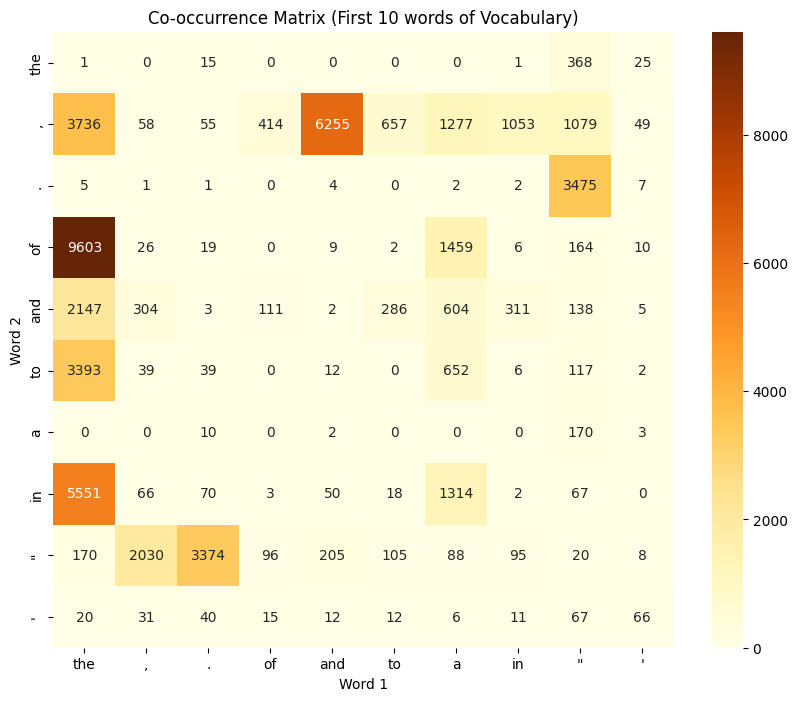

In [ ]:
#To see the result, I plot the first 10 words in a heatmap
first_10_matrix = coocurrence_matrix[:10, :10]
first_10_words = []

#Source: https://www.geeksforgeeks.org/python-get-first-k-items-in-dictionary/
for word, index in islice(vocab.items(), 10):
  first_10_words.append(word)

# Plotting the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(first_10_matrix,
            xticklabels = first_10_words,
            yticklabels = first_10_words,
            cmap = "YlOrBr", #Color scheme
            annot = True, # Adds values to cells
            fmt = ".0f") #Get rid of academic number formatting

plt.title("Co-occurrence Matrix (First 10 words of Vocabulary)")
plt.xlabel("Word 1")
plt.ylabel("Word 2")
plt.show()

## **Step 6: Function: most_similar_words()**